<a href="https://colab.research.google.com/github/Kaustuv1234/ML_from_scratch/blob/main/PCA_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [129]:
class PCA:
  def __init__(self, data):
    self.data = data
    self.get_eigen()

  def standardize(self):
    num = np.mean(self.data, axis=0)
    denom = np.std(self.data, axis=0)
    return (self.data - num) / denom

  def get_covariance_matrix(self, dof=0):
    X = self.standardize()
    self.n = X.shape[0]
    self.cols = X.shape[1]
    return np.dot(X.T, X) / (self.n - dof)

  def get_eigen(self):
    self.eval, evec = np.linalg.eig(self.get_covariance_matrix(dof=0))
    indx = np.argsort(self.eval)[::-1]
    self.eval.sort()
    self.eval = self.eval[::-1]
    self.vectors = evec[:, indx]

  def get_components(self, n_components):
    q =  self.vectors[:, :n_components]
    return q.reshape((n_components, self.cols))

  def get_component_plot(self):
    plt.rcParams['figure.figsize'] = [10, 10]
    x = np.array(range(1, self.cols+1))
    y = self.eval 
    y = y*100/np.sum(y)
    y = np.cumsum(y)
    plt.title('Informtion stored in first n components')
    plt.bar(x, y)
    plt.show()

  def print_2d(self):
    data2d = np.dot(self.get_components(2), self.data.T)
    fig = px.scatter(data2d, x=data2d[0], y=data2d[1], title='PCA first 2 components visualization', width=800, height=400)
    fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')), selector=dict(mode='markers'))
    print()
    fig.show()

  def print_3d(self):
    data3d = np.dot(self.get_components(3), self.data.T)
    fig = px.scatter_3d(data3d, x=data3d[0], y=data3d[1], z=data3d[2], title='PCA first 3 components visualization', width=800, height=400)
    fig.update_traces(marker=dict(size=2, line=dict(width=0.5, color='DarkSlateGrey')), selector=dict(mode='markers'))
    print()
    fig.show()




AUSTIN WEATHER DATASET

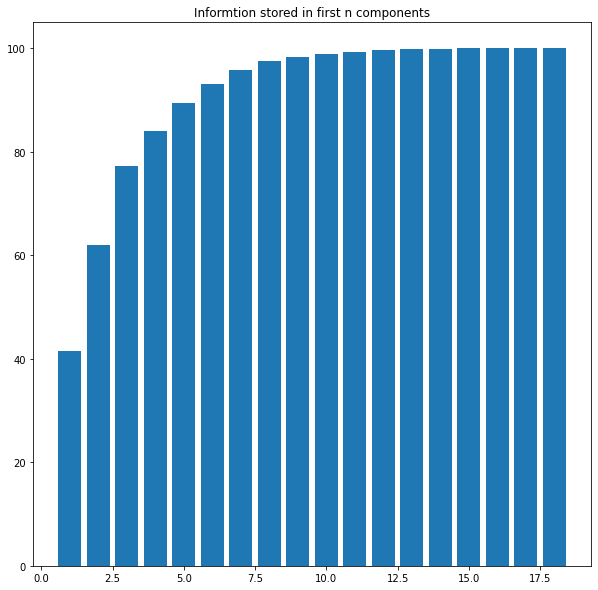

In [130]:
df = pd.read_csv('/content/drive/MyDrive/datasets/austin_weather.csv', delimiter=',')
df = df.iloc[:, 1:-2]

for column in df:
    df = df[df[column] != '-']

df = df.astype(float)
data = df.to_numpy()

pca1 = PCA(data)
pca1.get_component_plot()
pca1.print_2d()
pca1.print_3d()

RANDOMLY GENERATED DATASET

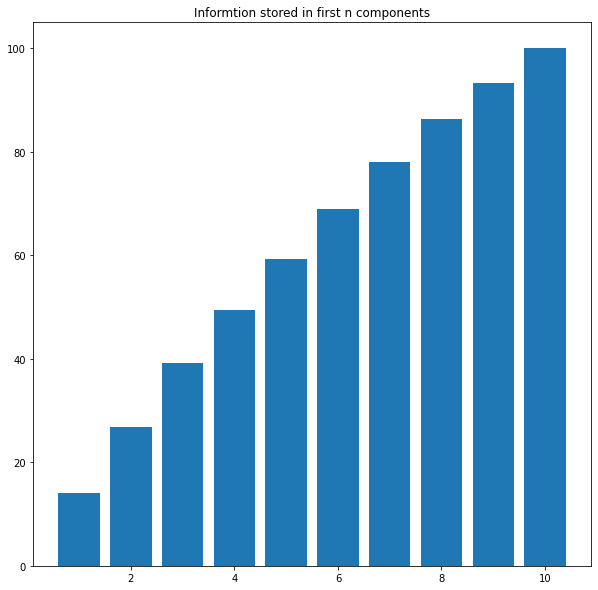

In [131]:
data = np.random.random((200, 10))
pca2 = PCA(data)
pca2.get_component_plot()
pca2.print_2d()
pca2.print_3d()

NORMAL DATASET

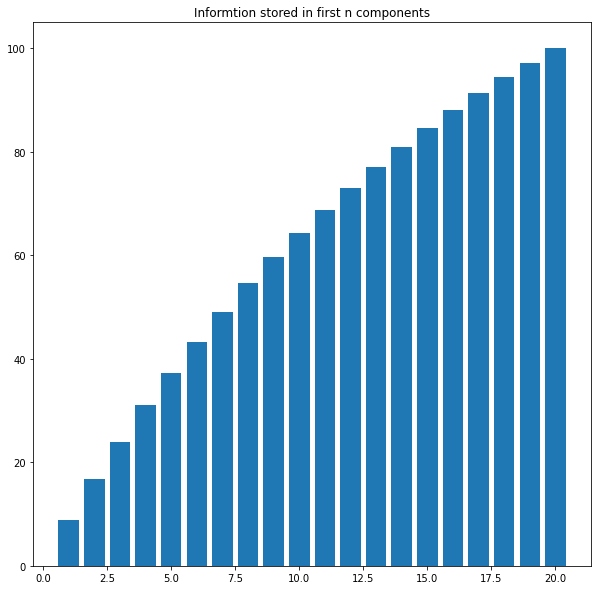

In [136]:
data3 = np.random.normal(5, 10, (200, 20))
pca3 = PCA(data3)
pca3.get_component_plot()
pca3.print_2d()
pca3.print_3d()

EXPONENT DATASET

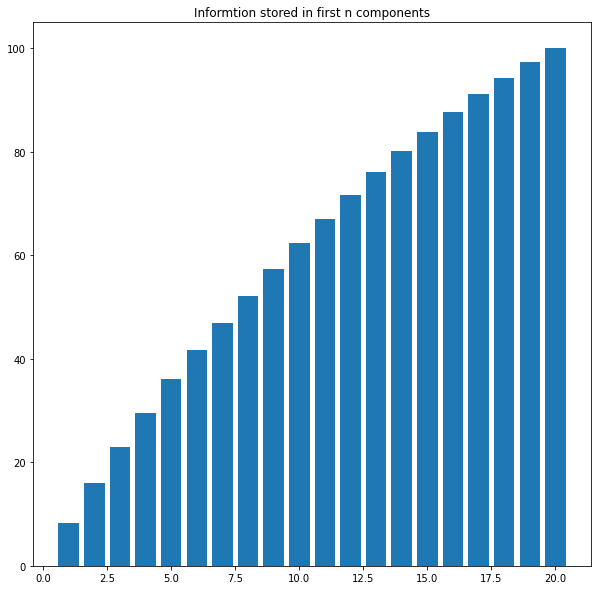

In [135]:
data4 = np.random.exponential(5, (200, 20))
pca4 = PCA(data4)
pca4.get_component_plot()
pca4.print_2d()
pca4.print_3d()